In [7]:
import numpy as np
from pandas_datareader import data as web
import matplotlib.pyplot as plt

In [8]:
PG = web.DataReader("PG", data_source="yahoo", start = "1995-1-1")

In [9]:
#https://finance.yahoo.com/quote/PG

In [10]:
PG.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
1995-01-03,15.62500,15.43750,15.46875,15.59375,3318400.0,6.280613
1995-01-04,15.65625,15.31250,15.53125,15.46875,2218800.0,6.230266
1995-01-05,15.43750,15.21875,15.37500,15.25000,2319600.0,6.142162
1995-01-06,15.40625,15.15625,15.15625,15.28125,3438000.0,6.154748
1995-01-09,15.40625,15.18750,15.34375,15.21875,1795200.0,6.129573


In [11]:
PG.tail()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2020-07-27,126.639999,125.540001,125.709999,126.320000,6464600.0,126.320000
2020-07-28,128.460007,126.290001,126.370003,127.879997,7644400.0,127.879997
2020-07-29,129.240005,127.360001,127.559998,128.309998,6702000.0,128.309998
2020-07-30,132.029999,129.649994,130.660004,131.419998,10400700.0,131.419998
2020-07-31,131.210007,129.270004,130.660004,131.119995,8487000.0,131.119995


# Simple Rate of Return

Used for calculating multiple securites in the same period

## Example of annual rate of return

Consider an investor that purchases a stock on Jan. 1, 2000, for 20 USD. The investor then sells it on Jan. 1, 2005, for 35 USD – a 15 USD profit. The investor also receives a total of 2 USD in dividends over the five-year holding period. 

In this example, the investor's total return over five years is 17 USD, or (17/20) 85% of the initial investment. The annual return required to achieve 85% over five years follows the formula for the compound annual growth rate (CAGR):

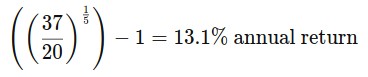


In [12]:
PG["simple_return"] = (PG["Adj Close"] / PG["Adj Close"].shift(1)) - 1

# an ALTERNATIVE way to calculate the simple return is today's price divided by yesterday's price - 1
# shift(1) get the previous date 
# the argumment of the function determines the number of lags 
# pandas.DataFrame.shift(# of lags)
#(shift index by #)

print(PG["simple_return"])

Date
1995-01-03         NaN
1995-01-04   -0.008016
1995-01-05   -0.014141
1995-01-06    0.002049
1995-01-09   -0.004090
                ...   
2020-07-27    0.002858
2020-07-28    0.012350
2020-07-29    0.003363
2020-07-30    0.024238
2020-07-31   -0.002283
Name: simple_return, Length: 6441, dtype: float64


In [13]:
PG["simple_return"].tail()

Date
2020-07-27    0.002858
2020-07-28    0.012350
2020-07-29    0.003363
2020-07-30    0.024238
2020-07-31   -0.002283
Name: simple_return, dtype: float64

In [14]:
PG["simple_return"].head()

Date
1995-01-03         NaN
1995-01-04   -0.008016
1995-01-05   -0.014141
1995-01-06    0.002049
1995-01-09   -0.004090
Name: simple_return, dtype: float64

In [15]:
print (PG["simple_return"])

Date
1995-01-03         NaN
1995-01-04   -0.008016
1995-01-05   -0.014141
1995-01-06    0.002049
1995-01-09   -0.004090
                ...   
2020-07-27    0.002858
2020-07-28    0.012350
2020-07-29    0.003363
2020-07-30    0.024238
2020-07-31   -0.002283
Name: simple_return, Length: 6441, dtype: float64


## Simple Rate of Return Part II

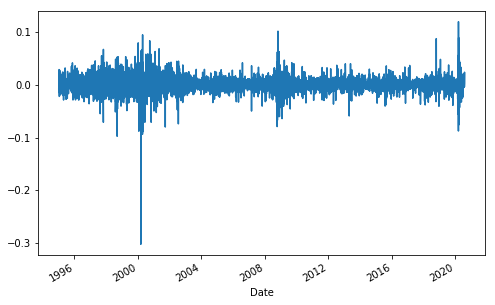

In [16]:
PG["simple_return"].plot(figsize=(8, 5))
#size of the graph 8 x 5

plt.show()

In [17]:
# pandas.DataFrame.mean() - calculates teh average daily rate of return

average_returns_daily = PG["simple_return"].mean()

print(average_returns_daily)

0.000575495347723789


In [18]:
average_returns_annually = PG["simple_return"].mean() * 250

# tradings day average 250, 251 or 252

print(average_returns_annually)

0.14387383693094724


In [19]:
print(f"Annual return {round(average_returns_annually, 5) * 100} %")

Annual return 14.387 %


## Logarithm rate of return

Used when making calculations about a single security (asset) over the same timeframe.

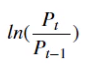

In [20]:
PG.head()

,High,Low,Open,Close,Volume,Adj Close,simple_return
Date,,,,,,,
1995-01-03,15.62500,15.43750,15.46875,15.59375,3318400.0,6.280613,NaN
1995-01-04,15.65625,15.31250,15.53125,15.46875,2218800.0,6.230266,-0.008016
1995-01-05,15.43750,15.21875,15.37500,15.25000,2319600.0,6.142162,-0.014141
1995-01-06,15.40625,15.15625,15.15625,15.28125,3438000.0,6.154748,0.002049
1995-01-09,15.40625,15.18750,15.34375,15.21875,1795200.0,6.129573,-0.004090


In [21]:
PG["logarithm_return"] = np.log(PG["Adj Close"] / PG["Adj Close"].shift(1))

print(PG["logarithm_return"])

Date
1995-01-03         NaN
1995-01-04   -0.008049
1995-01-05   -0.014242
1995-01-06    0.002047
1995-01-09   -0.004099
                ...   
2020-07-27    0.002854
2020-07-28    0.012274
2020-07-29    0.003357
2020-07-30    0.023949
2020-07-31   -0.002285
Name: logarithm_return, Length: 6441, dtype: float64


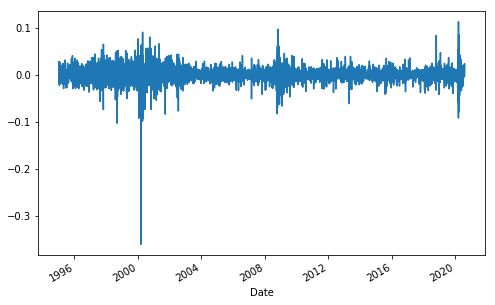

In [23]:
PG["logarithm_return"].plot(figsize=(8,5))
plt.show()

In [24]:
daily_logarithm_return = PG["logarithm_return"].mean()

print(daily_logarithm_return)

0.0004718393234101439


In [25]:
annualy_logarithm_return = PG["logarithm_return"].mean() * 250

print(annualy_logarithm_return)

0.11795983085253597


In [27]:
print(f"The anually logarithm return from Procter & Gamble is {round(annualy_logarithm_return, 5) * 100} %")

The anually logarithm return from Procter & Gamble is 11.796 %
